In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/pbl research/ETH-USD.csv')

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-08-11,1851.828369,1927.939209,1851.828369,1881.224121,1881.224121,23826986482
1,2022-08-12,1880.899170,1957.552979,1860.083496,1957.246460,1957.246460,17168141904
2,2022-08-13,1957.333984,2013.755737,1948.595215,1981.336548,1981.336548,16038975216
3,2022-08-14,1981.782471,2022.791504,1919.010132,1936.802002,1936.802002,14062754456
4,2022-08-15,1936.760498,2007.210327,1881.856812,1904.228149,1904.228149,20349931313


In [5]:
# Drop the 'Date' column as it's not needed for modeling
data = data.drop(columns=['Date'])

In [6]:
# Normalize the data using Min-Max scaling
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [7]:
# Define the number of time steps for the GRU model
time_steps = 10  # You can adjust this according to your need

In [8]:
# Prepare data with time steps
X = []
y = []
for i in range(len(data_scaled) - time_steps):
    X.append(data_scaled[i:i+time_steps, :])
    y.append(data_scaled[i+time_steps, 1])  # Assuming 'Open' price is the target

X = np.array(X)
y = np.array(y)

In [9]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [10]:
# Build the GRU model
model = Sequential()
model.add(GRU(64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(GRU(64, activation='relu', return_sequences=True))
model.add(GRU(64, activation='relu', return_sequences=True))
model.add(GRU(64, activation='relu', return_sequences=True))
model.add(GRU(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [12]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/50
5/5 [==============================] - 11s 432ms/step - loss: 0.0656 - mae: 0.2139 - val_loss: 0.0696 - val_mae: 0.2558
Epoch 2/50
5/5 [==============================] - 0s 89ms/step - loss: 0.0621 - mae: 0.2094 - val_loss: 0.0708 - val_mae: 0.2583
Epoch 3/50
5/5 [==============================] - 0s 91ms/step - loss: 0.0558 - mae: 0.2012 - val_loss: 0.0681 - val_mae: 0.2529
Epoch 4/50
5/5 [==============================] - 0s 90ms/step - loss: 0.0442 - mae: 0.1807 - val_loss: 0.0622 - val_mae: 0.2410
Epoch 5/50
5/5 [==============================] - 0s 95ms/step - loss: 0.0305 - mae: 0.1465 - val_loss: 0.0502 - val_mae: 0.2149
Epoch 6/50
5/5 [==============================] - 0s 96ms/step - loss: 0.0223 - mae: 0.1140 - val_loss: 0.0255 - val_mae: 0.1482
Epoch 7/50
5/5 [==============================] - 0s 67ms/step - loss: 0.0185 - mae: 0.1040 - val_loss: 0.0075 - val_mae: 0.0767
Epoch 8/50
5/5 [==============================] - 0s 49ms/step - loss: 0.0181 - mae: 0.1041 - v

In [13]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print("Mean Absolute Error:", mae)

3/3 [==============================] - 0s 11ms/step - loss: 0.0032 - mae: 0.0527
Mean Absolute Error: 0.05269612744450569


In [14]:
# Make predictions
predictions = model.predict(X_test)

3/3 [==============================] - 1s 10ms/step


In [15]:
# Inverse transform the predictions and true values to the original scale
predictions = scaler.inverse_transform(np.concatenate((X_test[:, -1, 1:], predictions), axis=1))[:, -1]
true_values = scaler.inverse_transform(np.concatenate((X_test[:, -1, 1:], y_test.reshape(-1, 1)), axis=1))[:, -1]

In [16]:
import matplotlib.pyplot as plt

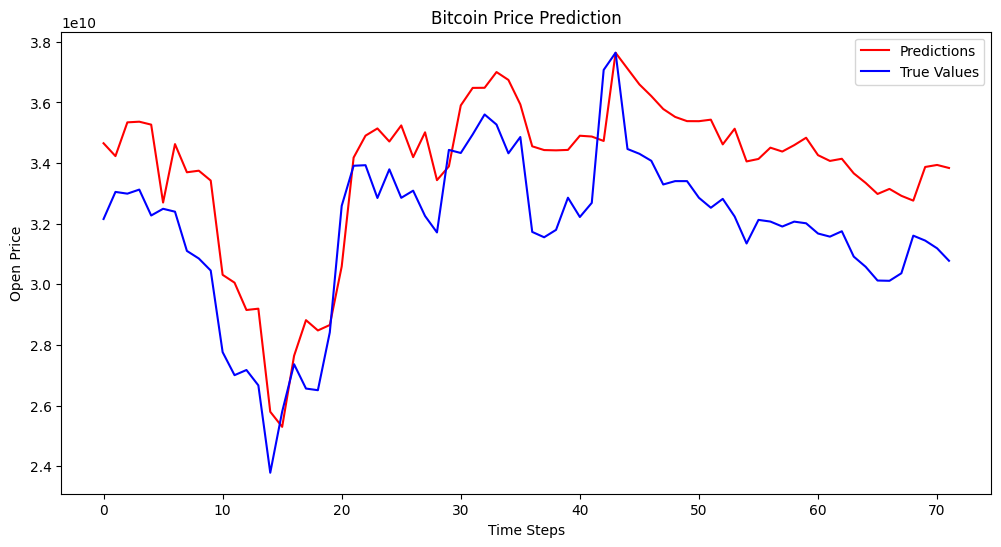

In [17]:
# Plot predictions vs. true values
plt.figure(figsize=(12, 6))
plt.plot(predictions, label='Predictions', color='red')
plt.plot(true_values, label='True Values', color='blue')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Time Steps')
plt.ylabel('Open Price')
plt.legend()
plt.show()

In [18]:
# Calculate percentage error
percentage_error = (abs(predictions - true_values) / true_values) * 100

# Print the percentage error
for i, error in enumerate(percentage_error):
    print(f"Sample {i+1}: Percentage Error = {error:.2f}%")

# Calculate and print the mean percentage error
mean_percentage_error = np.mean(percentage_error)
print("\nMean Percentage Error:", mean_percentage_error)

Sample 1: Percentage Error = 7.77%
Sample 2: Percentage Error = 3.57%
Sample 3: Percentage Error = 7.13%
Sample 4: Percentage Error = 6.76%
Sample 5: Percentage Error = 9.29%
Sample 6: Percentage Error = 0.63%
Sample 7: Percentage Error = 6.88%
Sample 8: Percentage Error = 8.34%
Sample 9: Percentage Error = 9.39%
Sample 10: Percentage Error = 9.75%
Sample 11: Percentage Error = 9.19%
Sample 12: Percentage Error = 11.30%
Sample 13: Percentage Error = 7.28%
Sample 14: Percentage Error = 9.48%
Sample 15: Percentage Error = 8.45%
Sample 16: Percentage Error = 1.95%
Sample 17: Percentage Error = 1.01%
Sample 18: Percentage Error = 8.49%
Sample 19: Percentage Error = 7.44%
Sample 20: Percentage Error = 0.85%
Sample 21: Percentage Error = 6.14%
Sample 22: Percentage Error = 0.79%
Sample 23: Percentage Error = 2.87%
Sample 24: Percentage Error = 6.98%
Sample 25: Percentage Error = 2.72%
Sample 26: Percentage Error = 7.27%
Sample 27: Percentage Error = 3.34%
Sample 28: Percentage Error = 8.56%


In [19]:
# Make predictions
predictions = model.predict(X_test)

# Inverse transform the predictions and true values to the original scale
predictions = scaler.inverse_transform(np.concatenate((X_test[:, -1, 1:], predictions), axis=1))[:, -1]
true_values = scaler.inverse_transform(np.concatenate((X_test[:, -1, 1:], y_test.reshape(-1, 1)), axis=1))[:, -1]

# Define a threshold for investment decision
invest_threshold = 1.0  # You can adjust this threshold as needed

3/3 [==============================] - 0s 11ms/step


In [20]:
# Determine investment decisions and print the results
for i in range(len(predictions)):
    if predictions[i] > X_test[i, -1, 1] * invest_threshold:
        decision = "Invest"
    else:
        decision = "Do not invest"

    print(f"Predicted Price: {predictions[i]:.2f} | Current Open Price: {X_test[i, -1, 1]:.2f} | Decision: {decision}")

Predicted Price: 34655588879.54 | Current Open Price: 0.77 | Decision: Invest
Predicted Price: 34231465694.30 | Current Open Price: 0.75 | Decision: Invest
Predicted Price: 35344683892.04 | Current Open Price: 0.77 | Decision: Invest
Predicted Price: 35366725687.51 | Current Open Price: 0.77 | Decision: Invest
Predicted Price: 35269639696.16 | Current Open Price: 0.77 | Decision: Invest
Predicted Price: 32699115441.60 | Current Open Price: 0.75 | Decision: Invest
Predicted Price: 34627296355.11 | Current Open Price: 0.76 | Decision: Invest
Predicted Price: 33698038646.75 | Current Open Price: 0.76 | Decision: Invest
Predicted Price: 33750081578.00 | Current Open Price: 0.72 | Decision: Invest
Predicted Price: 33425043672.10 | Current Open Price: 0.72 | Decision: Invest
Predicted Price: 30315503343.90 | Current Open Price: 0.71 | Decision: Invest
Predicted Price: 30056581371.50 | Current Open Price: 0.64 | Decision: Invest
Predicted Price: 29154935578.89 | Current Open Price: 0.62 | Dec

In [21]:
# Calculate daily price changes for true values and predictions
true_price_changes = true_values[1:] - true_values[:-1]
predicted_price_changes = predictions[1:] - true_values[:-1]

# Define a threshold for considering a change as profitable or in loss
profit_threshold = 0.0  # You can adjust this threshold based on your preference

# Calculate whether the predictions are in profit or loss
profit_or_loss = np.where(predicted_price_changes > profit_threshold, 'Profit', 'Loss')

# Print whether each prediction is in profit or loss
for i in range(len(profit_or_loss)):
    print(f"Prediction {i+1}: {profit_or_loss[i]}")

Prediction 1: Profit
Prediction 2: Profit
Prediction 3: Profit
Prediction 4: Profit
Prediction 5: Profit
Prediction 6: Profit
Prediction 7: Profit
Prediction 8: Profit
Prediction 9: Profit
Prediction 10: Loss
Prediction 11: Profit
Prediction 12: Profit
Prediction 13: Profit
Prediction 14: Loss
Prediction 15: Profit
Prediction 16: Profit
Prediction 17: Profit
Prediction 18: Profit
Prediction 19: Profit
Prediction 20: Profit
Prediction 21: Profit
Prediction 22: Profit
Prediction 23: Profit
Prediction 24: Profit
Prediction 25: Profit
Prediction 26: Profit
Prediction 27: Profit
Prediction 28: Profit
Prediction 29: Profit
Prediction 30: Profit
Prediction 31: Profit
Prediction 32: Profit
Prediction 33: Profit
Prediction 34: Profit
Prediction 35: Profit
Prediction 36: Loss
Prediction 37: Profit
Prediction 38: Profit
Prediction 39: Profit
Prediction 40: Profit
Prediction 41: Profit
Prediction 42: Profit
Prediction 43: Profit
Prediction 44: Loss
Prediction 45: Profit
Prediction 46: Profit
Predi

In [22]:
# Define a threshold for considering a trade profitable or in loss
profit_threshold = 0.02  # 2% profit
loss_threshold = -0.02   # 2% loss

# Calculate the price change from the previous day
price_change = true_values[1:] - true_values[:-1]

# Initialize lists to store trade decisions
trade_actions = []
trade_results = []

# Loop through the predictions and calculate trade decisions
for i in range(len(predictions)):
    if i == 0:
        trade_actions.append("HOLD")
        trade_results.append("N/A")
    else:
        if (predictions[i] - true_values[i-1]) / true_values[i-1] > profit_threshold:
            trade_actions.append("SELL")
            trade_results.append("Profit")
        elif (predictions[i] - true_values[i-1]) / true_values[i-1] < loss_threshold:
            trade_actions.append("SELL")
            trade_results.append("Loss")
        else:
            trade_actions.append("HOLD")
            trade_results.append("N/A")

# Print the trade decisions along with the results
for i in range(len(predictions)):
    print(f"Prediction: {predictions[i]:.2f}, True Value: {true_values[i]:.2f}, Action: {trade_actions[i]}, Result: {trade_results[i]}")

Prediction: 34655588879.54, True Value: 32156155847.28, Action: HOLD, Result: N/A
Prediction: 34231465694.30, True Value: 33050246060.43, Action: SELL, Result: Profit
Prediction: 35344683892.04, True Value: 32992568933.37, Action: SELL, Result: Profit
Prediction: 35366725687.51, True Value: 33126581621.79, Action: SELL, Result: Profit
Prediction: 35269639696.16, True Value: 32272414326.65, Action: SELL, Result: Profit
Prediction: 32699115441.60, True Value: 32493515723.61, Action: HOLD, Result: N/A
Prediction: 34627296355.11, True Value: 32397917379.55, Action: SELL, Result: Profit
Prediction: 33698038646.75, True Value: 31103785851.09, Action: SELL, Result: Profit
Prediction: 33750081578.00, True Value: 30853809609.11, Action: SELL, Result: Profit
Prediction: 33425043672.10, True Value: 30456166516.74, Action: SELL, Result: Profit
Prediction: 30315503343.90, True Value: 27765216954.52, Action: HOLD, Result: N/A
Prediction: 30056581371.50, True Value: 27005231321.80, Action: SELL, Resu